# Perkenalan

- Ardi Yuliantoro, Darry Ramadhan Abdussalam, Fajrul Faiz
- PYTN Batch 4
- Final Projek 2

Dataset Rain in Australia ini memiliki 23 atribut. Dengan data hujan harian selama 10 tahun di Australia,
kolom RainTomorrow adalah target variable yang mau kita prediksi. Jika “Yes” maka
besok harinya disana hujan 1mm atau lebih.

Attribut yang terdapat pada dataset Rain in Australia yaitu:
Attribute Information:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam
sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24
jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari
rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam
oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0,
langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi
melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

Dataset di dapat dari kaggle <a href="https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package">(Rain in Autralia)</a>

# Import Pustaka

In [35]:
# Import Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, mean_squared_error, r2_score

import pickle

# Data Loading

In [2]:
# Load dataset
df_ori = pd.read_csv('https://raw.githubusercontent.com/ardiy07/dataset/main/weatherAUS.csv')
df = df_ori.copy()

In [3]:
# Tampilkan data teratas
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Tampilkan informasi mengenai dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Tampilkan describe dataset
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
# Convert column date ke datetime
df['Date']= pd.to_datetime(df['Date'])

In [7]:
# Convert ke tahun
df['Year'] = df['Date'].dt.year

# Convert ke bulan
df['Month'] = df['Date'].dt.month

# Convert ke hari
df['Day'] = df['Date'].dt.day

In [8]:
# Hapus coloumn date
df.drop('Date', axis=1, inplace=True)

In [9]:
# Tampilkan data teratas
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


# Data Cleaning

In [10]:
# Cek dataset yang NAN
df.isna().sum()

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

Pada data tersebut terlihat, bahwa terdapat beberapa data yang masih Nan

In [11]:
# Mengambil data dengan type object
object_cols = df.select_dtypes(include = ['object']).columns

# Mengambil data dengan type float
float_cols = df.select_dtypes(include = ['float']).columns

Memisahkan data antara object dengan float bertujuan unutk mempermudah pengolahan data nantinya

In [12]:
# Drop data nan pada data yang memiliki type data object
df.dropna(axis=0, how='any', subset=object_cols, inplace=True)

Untuk mengatasi data NaN pada kolom dengan tipe objek, dilakukan penghapusan. Tujuan dari langkah ini adalah untuk mencegah terjadinya kecenderungan data yang diisi terlalu condong pada salah satu kriteria nilai objek tersebut. Dengan demikian, tindakan penghapusan ini dilakukan guna menjaga keseimbangan nilai objek dan menghindari bias yang mungkin timbul akibat ketidakhomogenan data.

In [13]:
# Mengisi data nan dengan median pada type data float
df[float_cols] = df[float_cols].fillna(df[float_cols].median())


Untuk tipe data float/angka, data NaN dapat diisi dengan nilai median dari kolom tersebut. Pendekatan ini digunakan untuk menggantikan nilai yang hilang dengan angka tengah dalam rangkaian data, dengan asumsi bahwa median akan mencerminkan nilai tengah yang representatif dari kumpulan data. Dengan mengisi data NaN menggunakan nilai median, kita dapat mempertahankan sebagian besar karakteristik distribusi data asli dan menghindari pengaruh yang signifikan terhadap statistik seperti mean atau rata-rata, yang rentan terhadap outlier atau nilai ekstrem.

In [14]:
# Cek kembali data Nan pada dataset
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
dtype: int64

Setelah melakukan penanganan terhadap data NaN, hasilnya menunjukkan bahwa tidak ada lagi data yang bernilai NaN.

In [15]:
# Cek apakah ada data diplikat
df.duplicated().sum()

0

Setelah dilakukan analisis, ditemukan bahwa tidak ada data yang terduplikat. Oleh karena itu, tidak perlu dilakukan penanganan tambahan terhadap data duplikat. Data tersebut telah terbebas dari duplikasi, sehingga dapat digunakan untuk analisis selanjutnya tanpa khawatir terhadap pengaruh ganda dari data yang sama.

# Exploration Data Analysis (EDA)

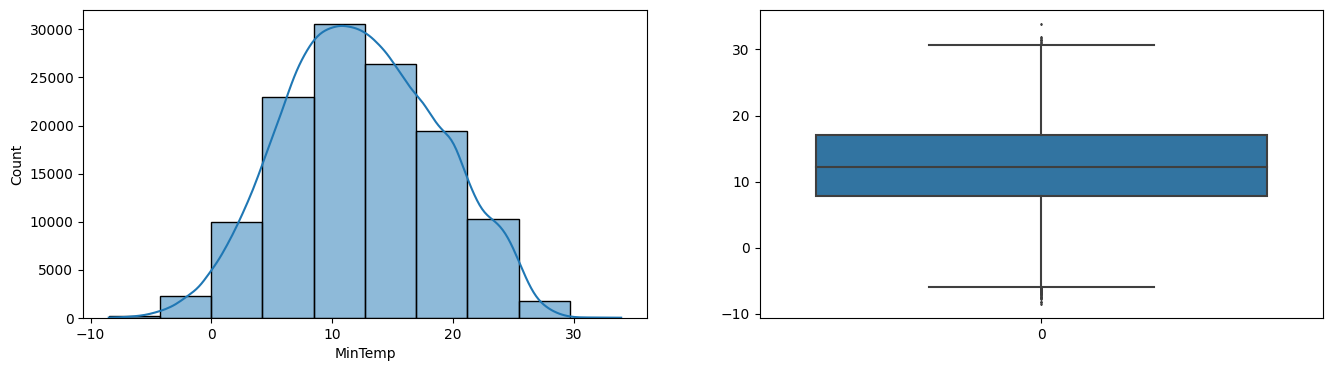

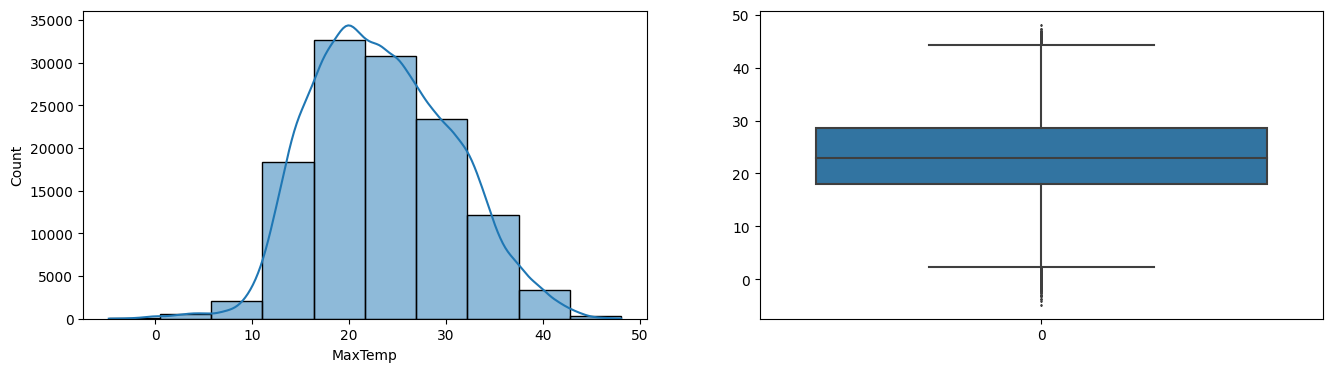

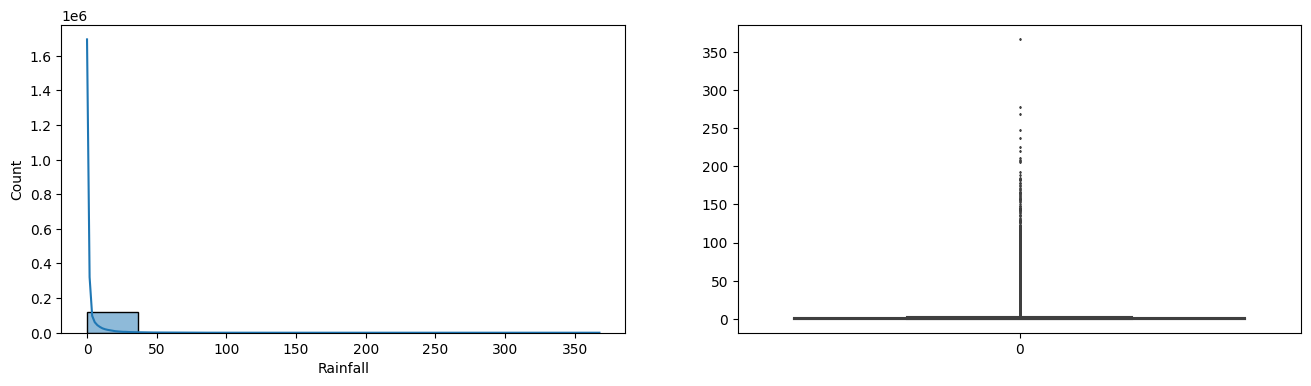

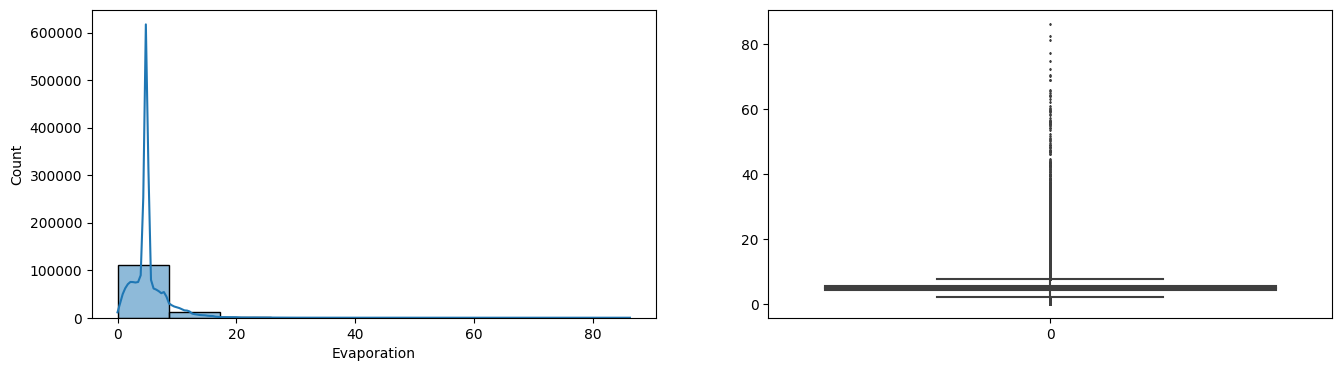

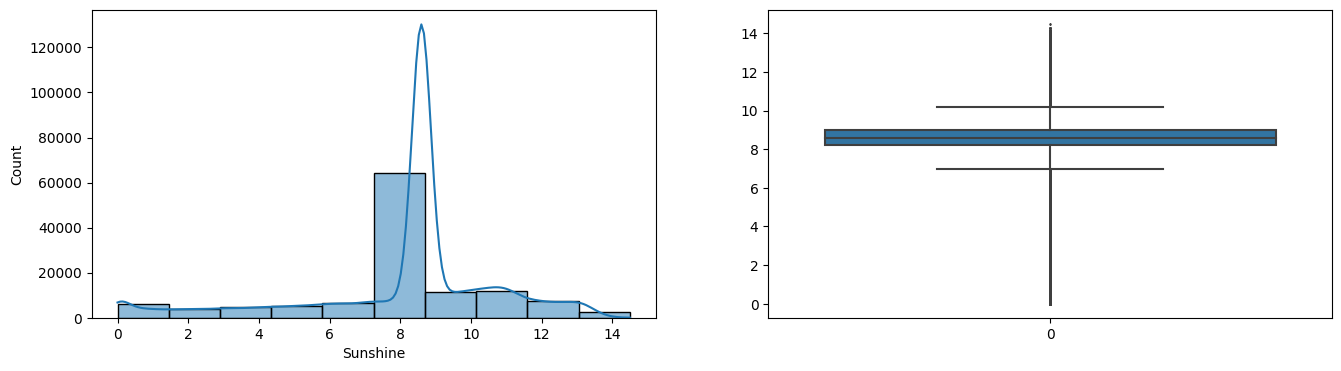

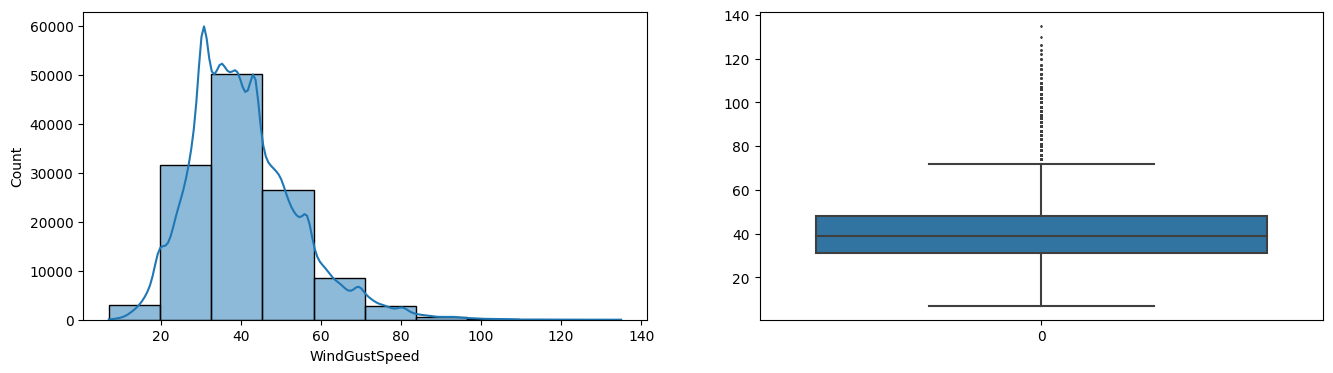

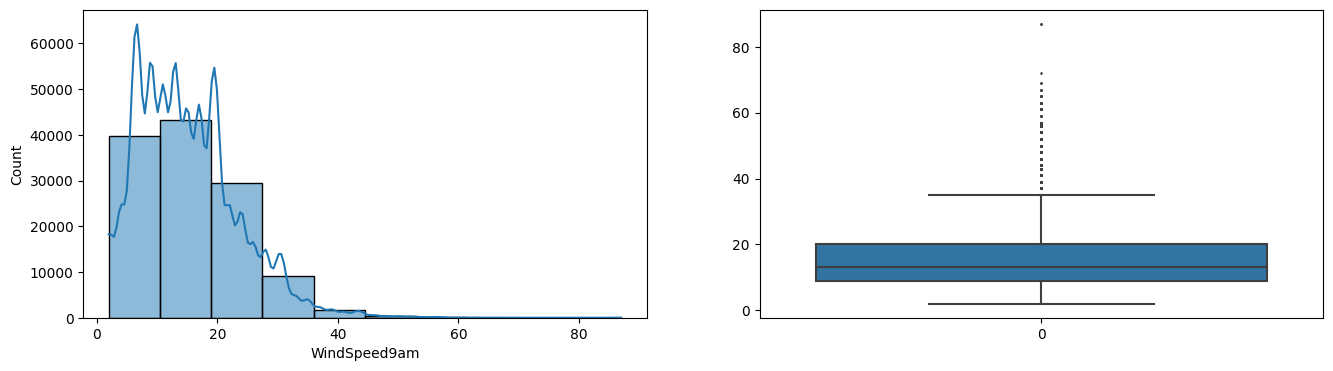

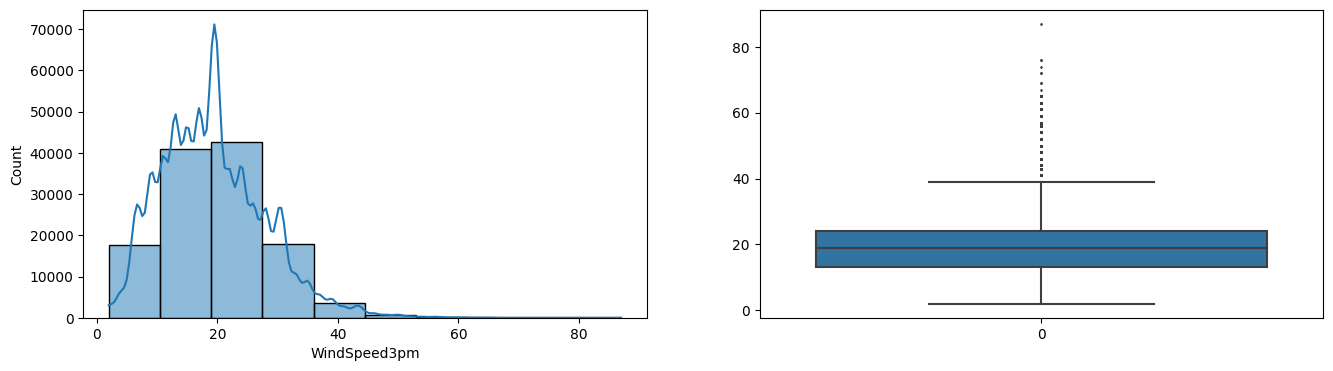

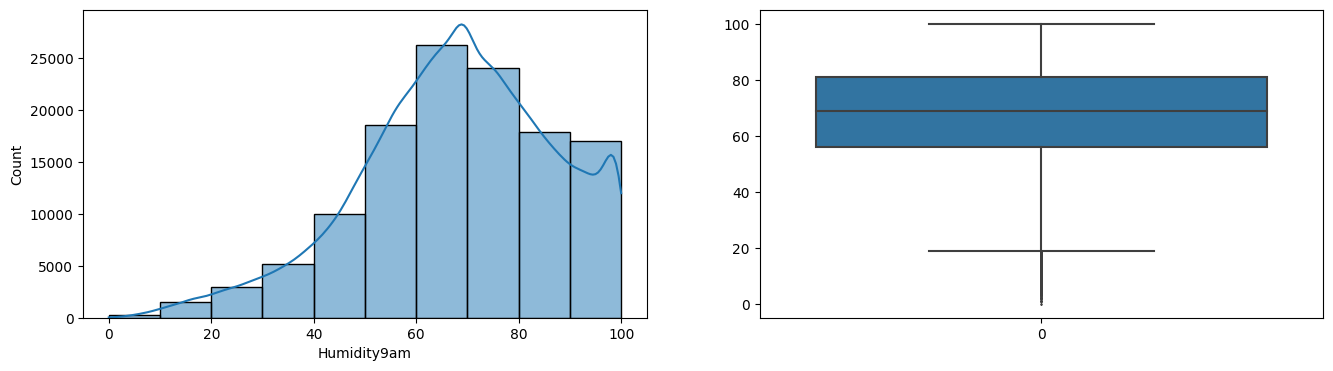

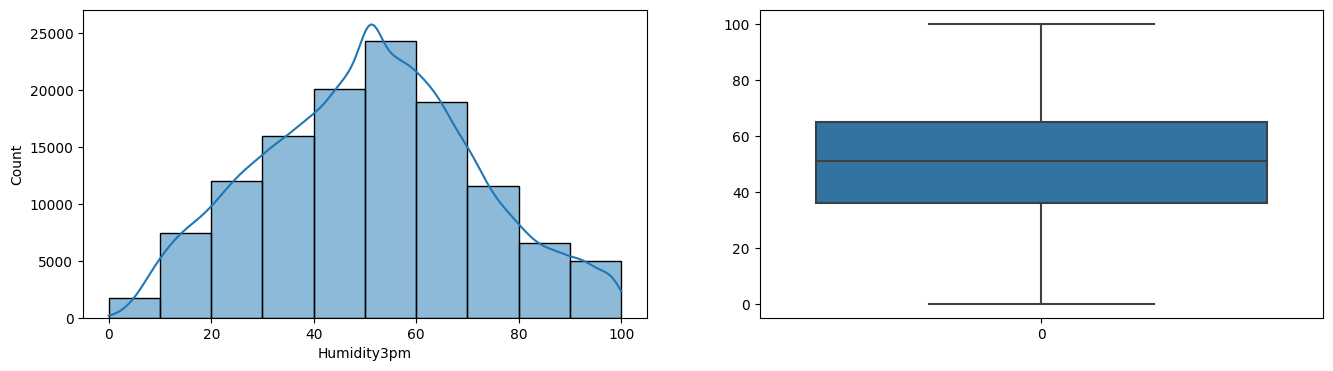

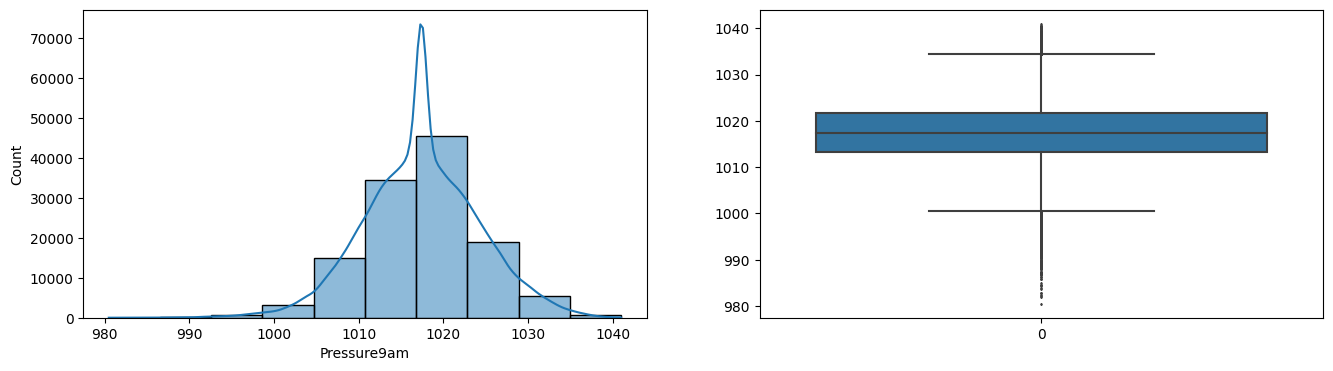

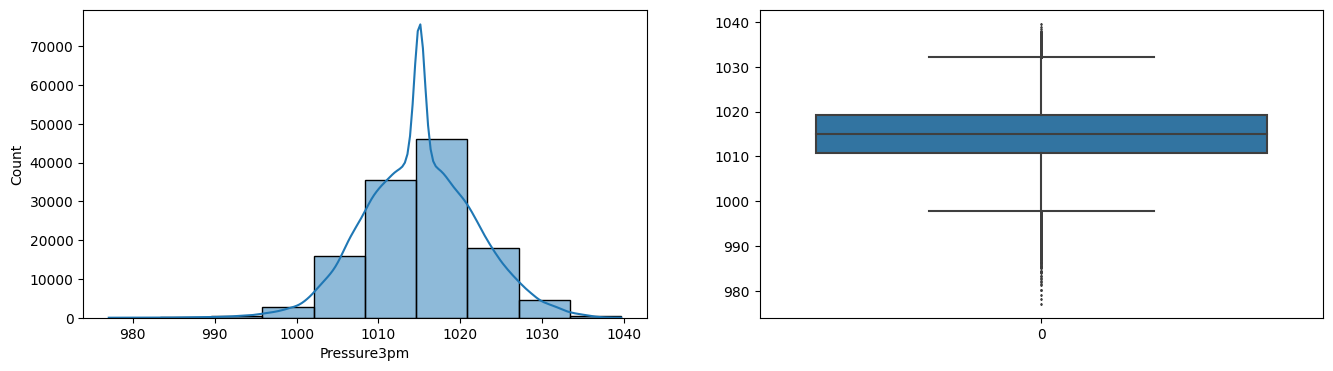

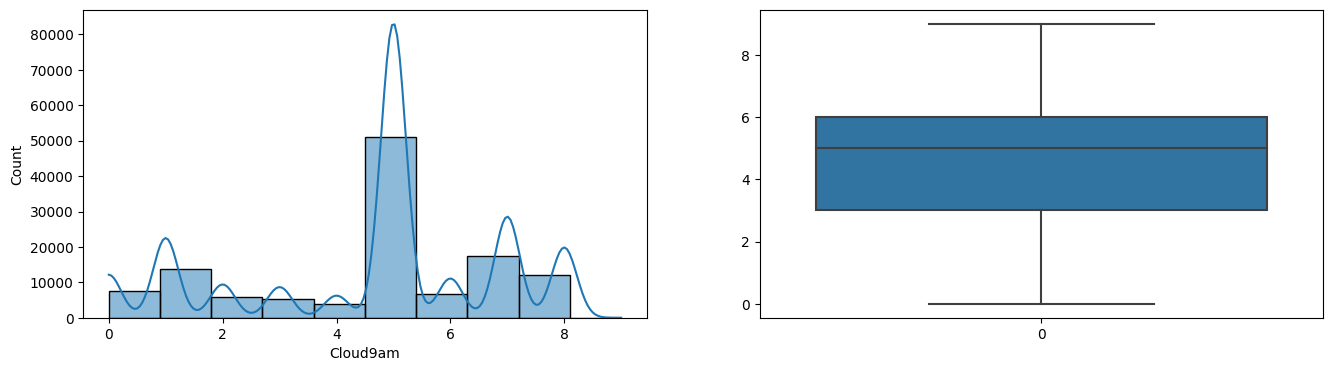

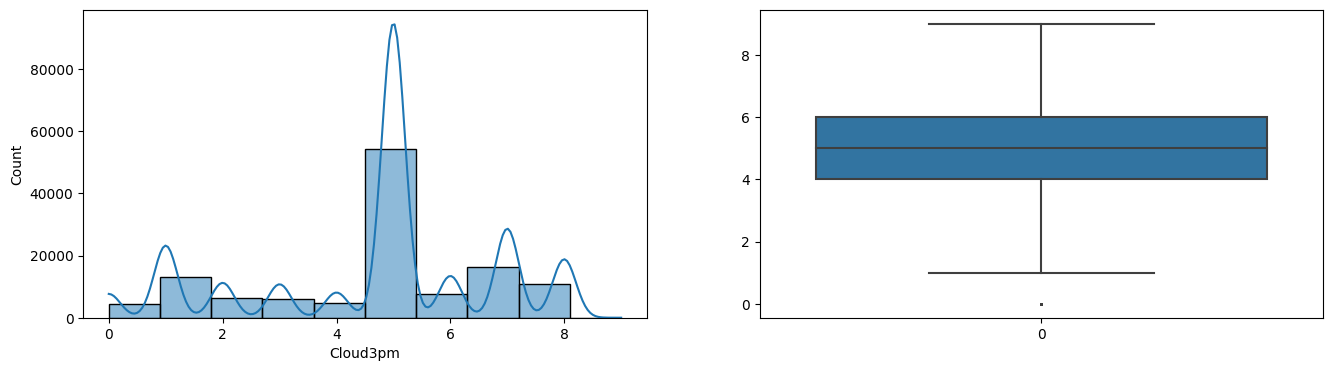

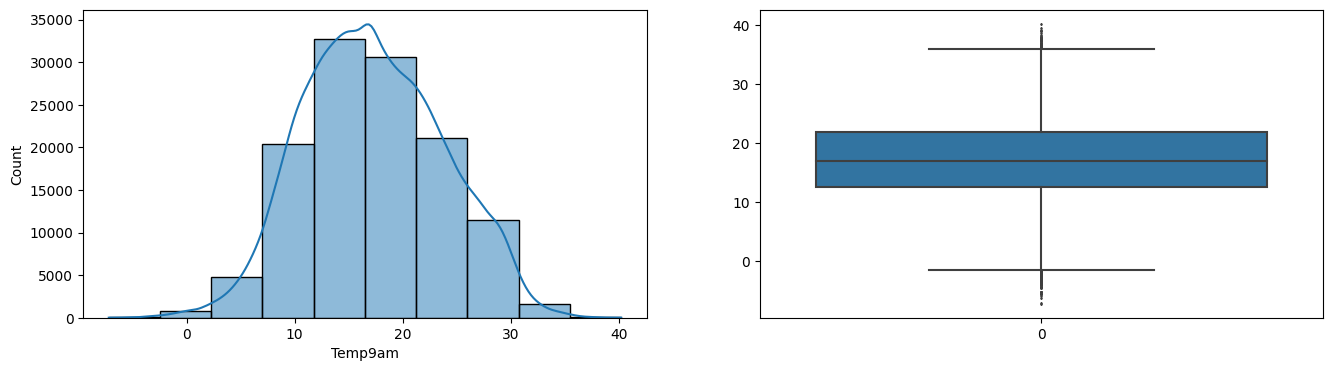

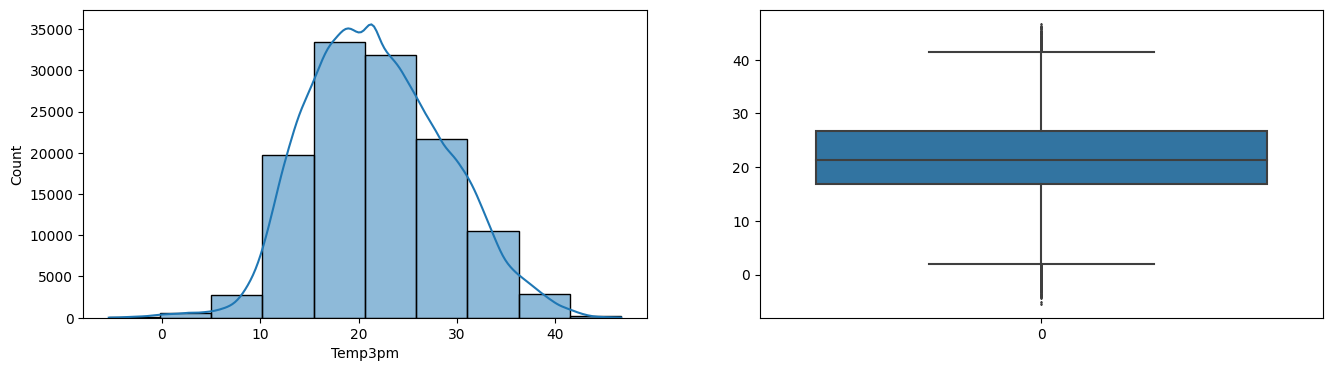

In [16]:
for col in float_cols: #Lakukan perulangan pada kolom bertipe float
    fig, ax = plt.subplots(ncols=2, figsize=(16, 4)) # Atur figur

    sns.histplot(df[col], bins=10, kde=True,  ax=ax[0]) # Tampilkan gambar dalam bentuk histplot

    sns.boxplot(df[col], fliersize=1, ax=ax[1]) # Tampilkan gambar dalam bentuk boxplot

Pada gambar tersebut terlihat bahwa, masih terdapat beberapa kolom yang memiliki outlier. Sehingga perlu dilakukan penganan pada outlier tersbut.

<Axes: title={'center': 'Rain Tomorrow'}>

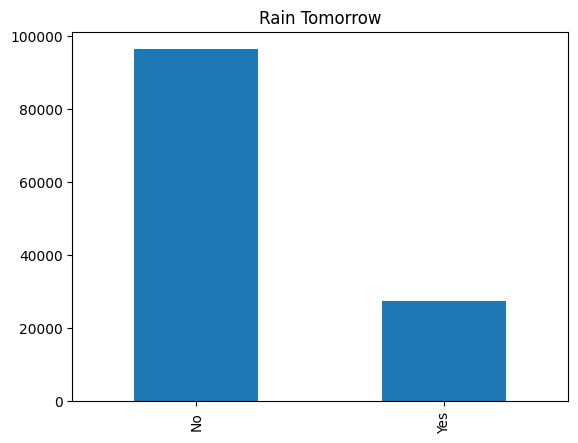

In [17]:
# jumlah data RainTomorrow
df['RainTomorrow'].value_counts().plot(kind='bar', title='Rain Tomorrow')

Untuk data Rain Tomorrow, data tidak hujan lebih banyak dari pada data yang hujan.

<Axes: title={'center': 'Rain Today'}>

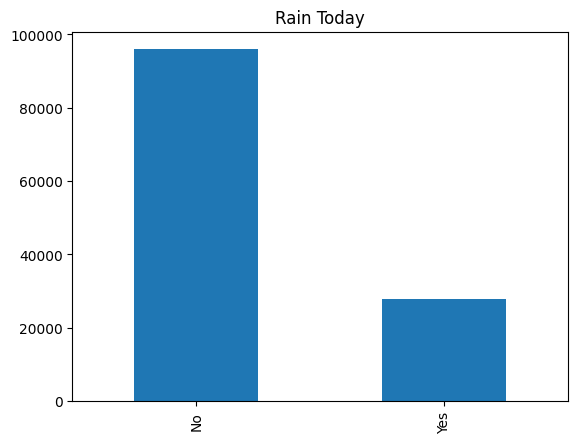

In [18]:
# jumlah data RainToday

df['RainToday'].value_counts().plot(kind='bar', title='Rain Today')

Untuk data Rain Today, data tidak hujan lebih banyak dari pada data yang hujan.

<Axes: title={'center': 'Location'}>

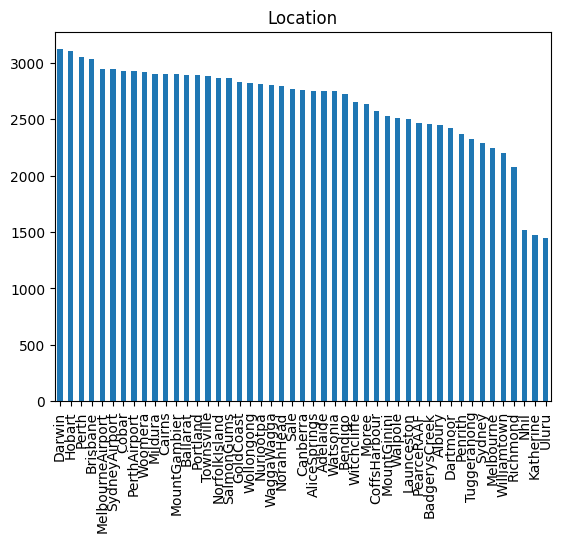

In [19]:
# jumlah data Location
df['Location'].value_counts().plot(kind='bar', title='Location')

Berdasarkan dataset, dapat diketahui bahwa lokasi (locati) yang paling banyak muncul adalah Darwin. Hal ini menunjukkan bahwa Darwin adalah lokasi yang paling sering tercatat dalam dataset tersebut. Informasi ini dapat berguna untuk analisis lebih lanjut terkait distribusi geografis atau pemahaman lebih lanjut tentang data yang terkait dengan lokasi Darwin.

<Axes: title={'center': 'Wi Dir 3pm'}>

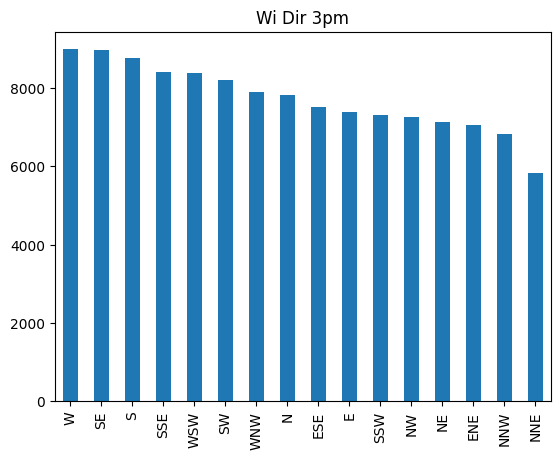

In [20]:
# jumlah data WinDir3pm
df['WindDir3pm'].value_counts().plot(kind='bar', title='Wi Dir 3pm')

Berdasarkan informasi yang diberikan, pada pukul 3 sore, angin memiliki kecepatan yang lebih tinggi dari arah barat (W). Hal ini menunjukkan bahwa angin pada saat itu bertiup dengan kecepatan yang signifikan dari arah yang berlawanan dengan arah barat.

<Axes: title={'center': 'Wind Dir 9am'}>

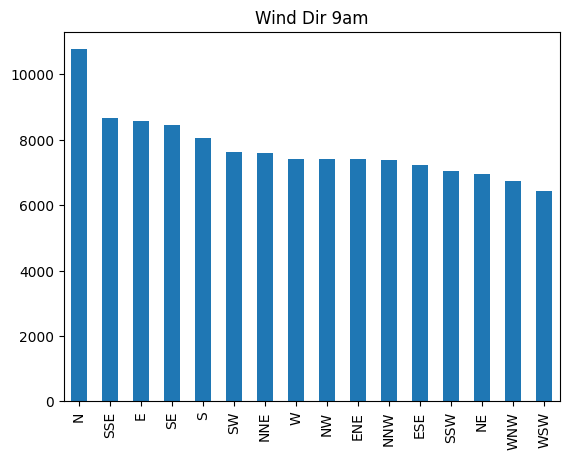

In [21]:
# jumlah data WindDir9am
df['WindDir9am'].value_counts().plot(kind='bar', title='Wind Dir 9am')

Berdasarkan informasi yang diberikan, pada pukul 9 pagi, angin memiliki kecepatan yang lebih tinggi daripada arah utara (N). Hal ini menunjukkan bahwa angin pada saat itu bertiup dengan kecepatan yang signifikan dari arah yang berbeda dengan utara.

<Axes: title={'center': 'Wind Gust Dir'}>

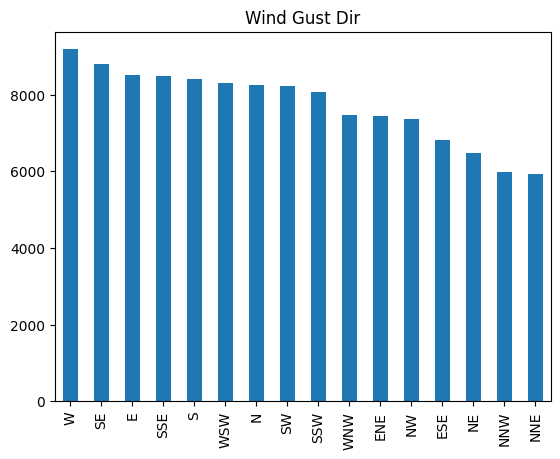

In [22]:
# jumlah data WindGustDir
df['WindGustDir'].value_counts().plot(kind='bar', title='Wind Gust Dir')

Berdasarkan data pada kolom "WindGustDir" (Arah Angin Puncak), ditemukan bahwa arah angin berada di arah barat (W). Ini menunjukkan bahwa saat data diambil, arah angin puncak atau angin dengan kecepatan puncak terjadi dari arah barat.

# Data Preprocessing

### 1. Preprocessing pada korelasi data

<Axes: >

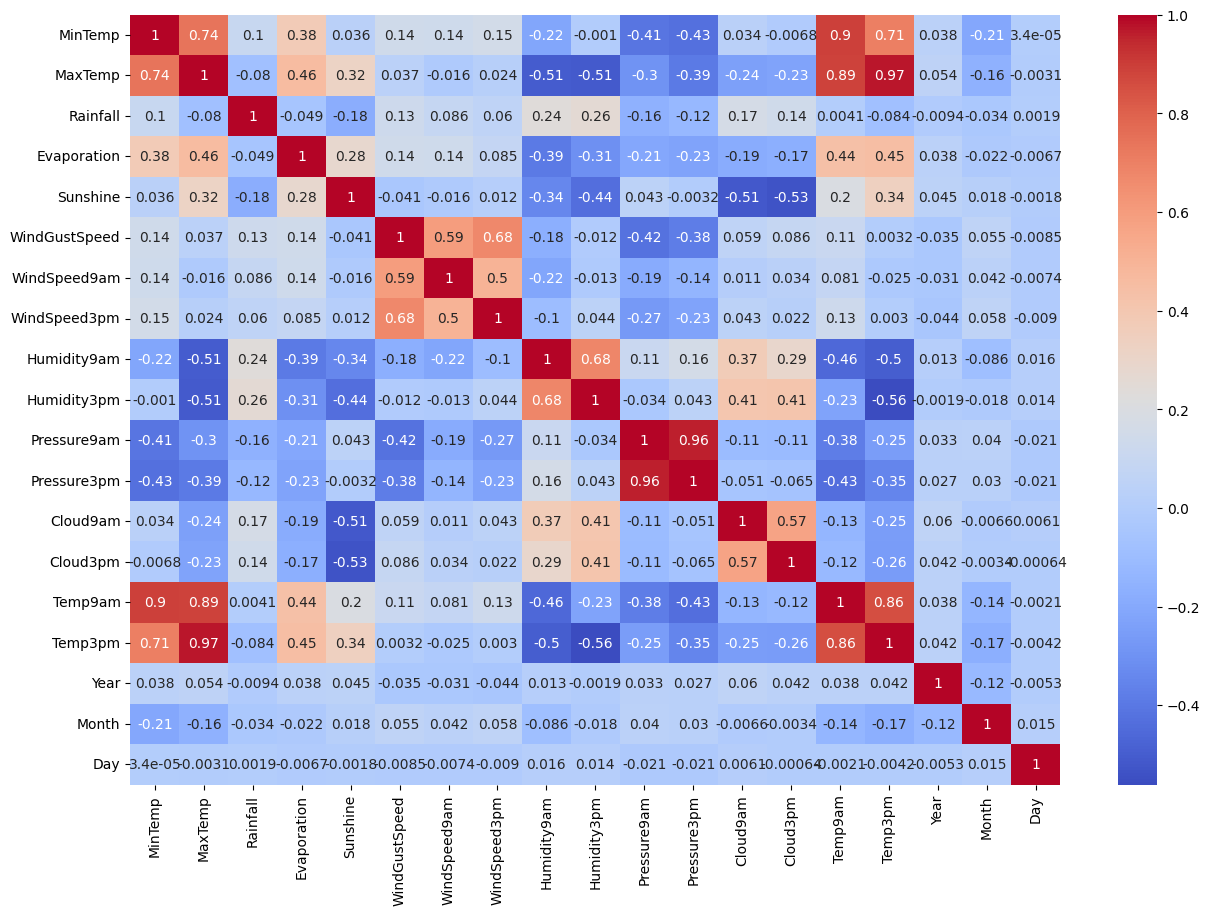

In [23]:
# Cek korelasi antar fitur
plt.figure(figsize=(15,10))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


Jika terdapat korelasi yang cukup tinggi antara dua kolom dalam dataset, langkah yang dapat diambil adalah melakukan penghapusan berdasarkan sumbu x. Dalam konteks penghapusan berdasarkan sumbu x, kolom yang memiliki korelasi tinggi akan dihapus dari dataset. Dengan menghapus salah satu kolom yang memiliki korelasi tinggi, kita dapat mengurangi redundansi informasi dalam dataset dan menghindari masalah multikolinearitas.

In [24]:
# Hapus fitur yang memiliki korelasi yang tinggi
df.drop(['MinTemp', 'Temp9am','Temp3pm','Pressure3pm', 'Humidity9am'], axis=1, inplace=True)

### 2. Preprocessing pada data outlier

In [25]:
# Menghandle outlier dengan membatasi nilai maksimum dan menghapus outlier serta menggantinya.
float_cols = df.select_dtypes(include = ['float']).columns

for col in float_cols:
  q1 = df[col].quantile(0.25) # Nilai q1 per colom
  q3 = df[col].quantile(0.75) # Nilai q2 per colom
  iqr = q3-q1
  Lower_tail = q1 - 1.5 * iqr
  Upper_tail = q3 + 1.5 * iqr
  for j in df[col]:
    if j > Upper_tail: # Cek batas atas quartil {q3)
      df[col] = df[col].replace(j, Upper_tail) # Mengganti quartil di batas atas dengan q3
    elif j < Lower_tail: # Cek batas bawah quartil (q1)
      df[col] = df[col].replace(j, Lower_tail)  # Mengganti quartil di batas bawah dengan q1
    else:
        continue

### 3. Encoding data object

In [26]:
# Lakukan encoding pada data object
object_cols = df.select_dtypes(include = ['object']).columns

le = LabelEncoder()

for col in object_cols:
  df[col] = le.fit_transform(df[col])

Tujuan di lakukan encoder bertujuan untuk mengubah data objek ke dalam bentuk numerik atau representasi yang dapat diproses oleh model atau algoritma machine learning. Encoder digunakan untuk mengatasi masalah ketika data yang ingin digunakan untuk pelatihan model atau algoritma memiliki jenis data non-numerik seperti teks atau kategori.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123710 entries, 0 to 145458
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123710 non-null  int64  
 1   MaxTemp        123710 non-null  float64
 2   Rainfall       123710 non-null  float64
 3   Evaporation    123710 non-null  float64
 4   Sunshine       123710 non-null  float64
 5   WindGustDir    123710 non-null  int64  
 6   WindGustSpeed  123710 non-null  float64
 7   WindDir9am     123710 non-null  int64  
 8   WindDir3pm     123710 non-null  int64  
 9   WindSpeed9am   123710 non-null  float64
 10  WindSpeed3pm   123710 non-null  float64
 11  Humidity3pm    123710 non-null  float64
 12  Pressure9am    123710 non-null  float64
 13  Cloud9am       123710 non-null  float64
 14  Cloud3pm       123710 non-null  float64
 15  RainToday      123710 non-null  int64  
 16  RainTomorrow   123710 non-null  int64  
 17  Year           123710 non-nul

In [28]:
# Pisah data target dengan feature
y = df['RainTomorrow'].copy() #data target
X = df.drop('RainTomorrow', axis=1).copy() # data feature

In [29]:
# Scaller Data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [30]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Modeling

## Logistic Regression

In [31]:
# Load model Logistic Regression
lr = LogisticRegression(solver='liblinear', random_state=0)
lr.fit(X_train, y_train) # Lakukan fit pada data training

LogisticRegression(random_state=0, solver='liblinear')

In [32]:
# Lakukan prediksi
y_pred = lr.predict(X_test)

In [33]:
# Akurasi dari model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8481933554280171


Pada hasil tersebut, akurasi dari logistic region sebanyak 85%

In [40]:
mse = mean_squared_error(y_test, y_pred) #hitung mean suqered error
r2 = r2_score(y_test, y_pred) #hitung r2 score

# Menampilkan hasil evaluasi
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 0.15180664457198287
R-squared (R2): 0.11741070613248705


## SVM

In [41]:
# Model SVM
svm = SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf', max_iter=-1, probability=False, random_state=None, shrinking=True, tol=0.001, verbose=False)
svm.fit(X_train, y_train) #Lakukan fit pada data training
y_pred = svm.predict(X_test) # Lakukan predict

In [42]:
# Akurasi dari model
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8551046803007033


Pada hasil tersebut, akurasi dari logistic region sebanyak 86%

In [43]:
mse = mean_squared_error(y_test, y_pred) #hitung mean suqered error
r2 = r2_score(y_test, y_pred) #hitung r2 score

# Menampilkan hasil evaluasi
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2):', r2)

Mean Squared Error (MSE): 0.14489531969929675
R-squared (R2): 0.1575924870833243


## Eksport Model

In [44]:
clf_filename = 'Rain_in_Australia_LR1.pkl' #nama file model
pickle.dump(lr, open(clf_filename, 'wb')) #Ekport model

# Inferencing

In [45]:
# Load model
load_model = pickle.load(open('/content/Rain_in_Australia_LR1.pkl', 'rb'))

In [46]:
# Lakukan Prediksi
load_model.predict([[1,	22.9,	0.6,	4.8,	8.6,	13,	44.0,	13,	14,	20.0,	24.0,	22.0,	1007.7,	8.0,	5.0,	0,	2008,	12,	1]])

array([0])

Untuk percobaan, setelah dilakukan prediksi. Didapatkan hasil 0, yang bearti untuk prediksi dengan data tersebut tidak hujan.

# Kesimpulan

1. Dalam dataset tersebut, terdapat ketidakseimbangan dalam persebaran data antara prediksi hujan dan tidak hujan. Ini berarti jumlah data yang diklasifikasikan sebagai hujan dan tidak hujan tidak proporsional atau tidak seimbang.
2. Dalam hasil evaluasi, model Logistic Regression memiliki tingkat akurasi sebesar 85%, sedangkan model SVM (Support Vector Machine) memiliki tingkat akurasi sebesar 86%. Hal ini menunjukkan bahwa kedua model memiliki kinerja yang cukup baik dalam melakukan prediksi berdasarkan data yang digunakan.
3. Dari hasil yang didapatkan, perbandingan model antara Logistic Regression dengan SVM, pada tingkat akurasi lebih baik pada model SVM dari pada Logistic Regression dengan perbedaan 1%.
4. Dari hasil tersebut, sehingga dapat disimpulkan dalam memprediksi Rain in Australia, model yang lebih baik digunakan adalah SVM.